In [21]:
#importing the required modules
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# loading data from the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# reshape format : [samples][width][height][channels]
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28,1)

In [11]:
# one hot encode
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [16]:
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax')) #10 chosen because we have 10 different digits to be classified
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [18]:
# build the model
model = baseline_model()
# Fit the model
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 38s 109ms/step - loss: 7.1919 - accuracy: 0.7782 - val_loss: 0.1186 - val_accuracy: 0.9649
Epoch 2/10
300/300 [==============================] - 33s 111ms/step - loss: 0.1237 - accuracy: 0.9651 - val_loss: 0.0841 - val_accuracy: 0.9760
Epoch 3/10
300/300 [==============================] - 33s 109ms/step - loss: 0.0753 - accuracy: 0.9773 - val_loss: 0.0742 - val_accuracy: 0.9795
Epoch 4/10
300/300 [==============================] - 33s 109ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0619 - val_accuracy: 0.9824
Epoch 5/10
300/300 [==============================] - 33s 109ms/step - loss: 0.0391 - accuracy: 0.9866 - val_loss: 0.0547 - val_accuracy: 0.9833
Epoch 6/10
300/300 [==============================] - 33s 109ms/step - loss: 0.0314 - accuracy: 0.9895 - val_loss: 0.0600 - val_accuracy: 0.9833
Epoch 7/10
300/300 [==============================] - 33s 110ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0641 - val_ac

In [20]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(scores[1]*100)


98.42000007629395


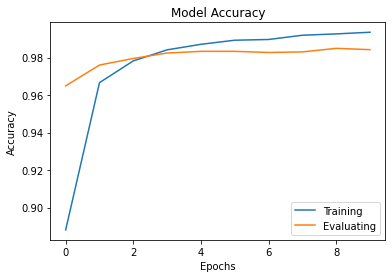

In [23]:
# plotting 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Evaluating'])